### **Importing** **libraries**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('/content/credit_data.csv')
df

,clientid,income,age,loan,LTI,default
0,1,66155.92510,59,8106.532131,0.122537,0
1,2,34415.15397,48,6564.745018,0.190752,0
2,3,57317.17006,63,8020.953296,0.139940,0
3,4,42709.53420,46,6103.642260,0.142911,0
4,5,66952.68885,19,8770.099235,0.130990,1
...,...,...,...,...,...,...
1995,1996,59221.04487,49,1926.729397,0.032535,0
1996,1997,69516.12757,23,3503.176156,0.050394,0
1997,1998,44311.44926,28,5522.786693,0.124636,1
1998,1999,43756.05660,64,1622.722598,0.037086,0


In [36]:
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.92510,59,8106.532131,0.122537,0
1,2,34415.15397,48,6564.745018,0.190752,0
2,3,57317.17006,63,8020.953296,0.139940,0
3,4,42709.53420,46,6103.642260,0.142911,0
4,5,66952.68885,19,8770.099235,0.130990,1


In [37]:
df.shape

(2000, 6)

In [38]:
df.dtypes

,0
clientid,int64
income,float64
age,int64
loan,float64
LTI,float64
default,int64


In [39]:
df.isna().sum()

,0
clientid,0
income,0
age,0
loan,0
LTI,0
default,0


In [40]:
df = df.drop_duplicates()
df

,clientid,income,age,loan,LTI,default
0,1,66155.92510,59,8106.532131,0.122537,0
1,2,34415.15397,48,6564.745018,0.190752,0
2,3,57317.17006,63,8020.953296,0.139940,0
3,4,42709.53420,46,6103.642260,0.142911,0
4,5,66952.68885,19,8770.099235,0.130990,1
...,...,...,...,...,...,...
1995,1996,59221.04487,49,1926.729397,0.032535,0
1996,1997,69516.12757,23,3503.176156,0.050394,0
1997,1998,44311.44926,28,5522.786693,0.124636,1
1998,1999,43756.05660,64,1622.722598,0.037086,0


In [41]:
df.drop(columns=['clientid'], inplace=True)


In [42]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
x

,income,age,loan,LTI
0,66155.92510,59,8106.532131,0.122537
1,34415.15397,48,6564.745018,0.190752
2,57317.17006,63,8020.953296,0.139940
3,42709.53420,46,6103.642260,0.142911
4,66952.68885,19,8770.099235,0.130990
...,...,...,...,...
1995,59221.04487,49,1926.729397,0.032535
1996,69516.12757,23,3503.176156,0.050394
1997,44311.44926,28,5522.786693,0.124636
1998,43756.05660,64,1622.722598,0.037086


In [44]:
y

,default
0,0
1,0
2,0
3,0
4,1
...,...
1995,0
1996,0
1997,1
1998,0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
x_train

,income,age,loan,LTI
968,60016.07961,54,2857.007414,0.047604
240,45985.10865,54,7382.056426,0.160531
819,40185.77567,31,1002.340574,0.024943
692,54780.34561,61,8134.220408,0.148488
420,30595.74801,41,3495.069881,0.114234
...,...,...,...,...
1130,52651.25686,57,6529.019522,0.124005
1294,32282.25175,43,3345.941958,0.103646
860,27287.07454,19,4509.881422,0.165275
1459,67800.58133,29,5035.139378,0.074264


In [47]:
x_test

,income,age,loan,LTI
1860,40240.72756,27,7498.630447,0.186344
353,46706.45886,19,7084.263509,0.151676
1333,51211.65404,46,4093.360006,0.079930
905,67675.80477,38,4396.076877,0.064958
1289,36965.74248,54,6333.391588,0.171331
...,...,...,...,...
965,52920.14801,21,9521.769942,0.179927
1284,48058.87138,48,6527.990222,0.135833
1739,53289.06797,32,7395.513416,0.138781
261,50514.46963,57,2003.653570,0.039665


In [48]:
y_train

,default
968,0
240,0
819,0
692,0
420,0
...,...
1130,0
1294,0
860,1
1459,0


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
y_pred


array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [55]:
prediction = classifier.predict(scaler.transform([[32,150000,76,86565]]))
print(prediction)

if (prediction[0]== 0):
  print('The Person will not purchase')
else:
  print('The Person will purchase')

[1]
The Person will purchase


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score
result=confusion_matrix(y_test,y_pred)
result

array([[315,  15],
       [ 13,  57]])

In [57]:
score=accuracy_score(y_test,y_pred)
score

0.93

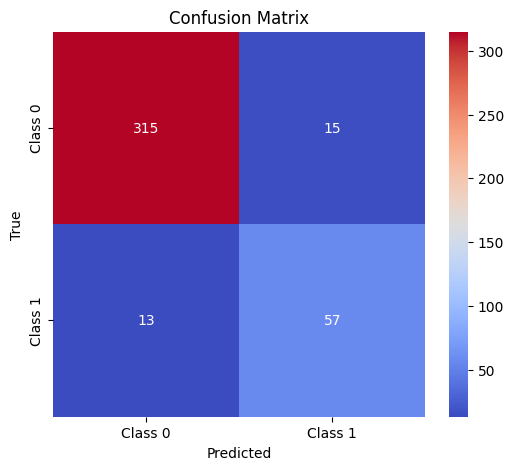

In [59]:
plt.figure(figsize=(6, 5))
sns.heatmap(result, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()